# Exercise Fourteen: Project Design Starter

In this exercise, you'll be planning out a complex project. You'll draw in some code, but focus on commenting to describe your project structure. The sample document below will guide you through organizing and annotating your project design. The primary components you'll include are:

- **Dependencies:** What modules will your project need?
- **Collection:** Where is your data coming from?
- **Processing:** How will you format and process your data?
- **Analysis:** What techniques will you use to understand your data?
- **Visualization:** How will you visualize and explore your data?

Don't worry if you aren't exactly certain how you would implement everything - this should be a starting point for a larger research study, but it doesn't need to be a complete, functional workflow. Aim for a "good enough" starting point that you can reference and extend for future work. 

Note where you have something working, and where it's broken or in progress.

## Project Overview

Much of my research focuses on World War I American war dead interred in American Battle Monuments Commission (ABMC) cemeteries.  These eight cemeteries are located in France, Belgium, and the United Kingdom.  The ABMC affords users the ability to download CSV files of their cemetery interment records.  Previously, I used Pandas data frames to analyze and create visualizations for the Aisne-Marne American Cemetery.  For this workflow, I will use all WWI ABMC interment data in order to analyze the entire interment population of all WWI ABMC cemeteries.  I want to generate breakdowns of cemetery, branch, rank, and state.  I’d also like to generate useful visualizations for future writing on this matter.  I’d also like to plot each location on a map using cartopy.  Then, I will generate some word clods based on the various Units these war dead served in.

## Dependencies

The following import lines contain the features needed to process the CSV files.  Each line is annotated with its purpose.

In [1]:
import pandas as pd # Importing Pandas to handle the data frames
import os # Importing os to pull all csv files
import nltk # This will allow text analysis of the csv files
import nltk.tokenize # This will tolenize the text
import cartopy.crs as ccrs # Importing cartopy will allow me to bring in map based visualizations
import matplotlib.pyplot as plt # This will assist in the map plotting
import re #Text analysis
from bs4 import BeautifulSoup # Analyzing text within df columns
from wordcloud import WordCloud #create word clouds 


## Collection

There are a couple ways I can import the csv files for analysis.  I would prefer to import each csv file as its own item, as I think this would allow for individual CSV analysis.  But for simplicity, I was able to download a single CSV file containing all related interment data.  I will rely on the Week 5 Pandas demos and the Week 8 CSV demos.

In [2]:
abmc_df = pd.read_csv('all_abmc_wwi.csv', delimiter=",") # This csv file contains all interment data from abmc wwi cemeteries

abmc_df # Prints data frame

C:\Users\Stoddard\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (23) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Last Name,First Name,Middle Name,Suffix,Rank,Service Number,Service/Serial #,Unit,Branch,field_place_of_entry,...,Court,Wall,Crypt,Memorialized Location,Cemetery/Memorial,War/Conflict,Awards,Notes,ABMC Burial Unit,Missing Status
0,Aaron,John,D,NaN,Private First Class,NaN,NaN,NaN,U.S. Army,New Jersey,...,NaN,NaN,NaN,NaN,Meuse-Argonne American Cemetery,World War I,NaN,NaN,"114th Infantry Regiment, 29th Division",NaN
1,Aas,Peter,A,NaN,Private,NaN,NaN,NaN,U.S. Army,Montana,...,NaN,NaN,NaN,NaN,Suresnes American Cemetery,World War I,NaN,NaN,"38th Infantry Regiment, 3rd Division",NaN
2,Aase,Ole,R,NaN,Private,NaN,NaN,NaN,U.S. Army,North Dakota,...,NaN,NaN,NaN,NaN,Meuse-Argonne American Cemetery,World War I,NaN,NaN,"138th Infantry Regiment, 35th Division",NaN
3,Aasgaard,Almer,M,NaN,Private,NaN,NaN,NaN,U.S. Army,Minnesota,...,NaN,NaN,NaN,NaN,Oise-Aisne American Cemetery,World War I,NaN,NaN,"305th Field Artillery Regiment, 77th Division",NaN
4,Aasland,Carl,NaN,NaN,Private,NaN,NaN,NaN,U.S. Army,Wisconsin,...,NaN,NaN,NaN,NaN,Suresnes American Cemetery,World War I,NaN,NaN,"343rd Infantry Regiment, 86th Division",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35353,Zurinski,John,K,NaN,Private,NaN,NaN,NaN,U.S. Army,Pennsylvania,...,NaN,NaN,NaN,NaN,Meuse-Argonne American Cemetery,World War I,NaN,NaN,"61st Infantry Regiment, 5th Division",NaN
35354,Zwiefelhoefer,Albert,A,NaN,Private,NaN,NaN,NaN,U.S. Army,Ohio,...,NaN,NaN,NaN,NaN,Meuse-Argonne American Cemetery,World War I,NaN,NaN,"61st Infantry Regiment, 5th Division",NaN
35355,Zybach,Arthur,R,NaN,Private First Class,NaN,NaN,NaN,U.S. Army,Texas,...,NaN,NaN,NaN,NaN,Meuse-Argonne American Cemetery,World War I,NaN,NaN,"9th Infantry Regiment, 2nd Division",NaN
35356,Zyglarski,Stanley,P,NaN,Corporal,NaN,NaN,NaN,U.S. Marine Corps,New York,...,NaN,NaN,NaN,NaN,Meuse-Argonne American Cemetery,World War I,NaN,NaN,"6th USMC Machine Gun Bn, 2nd Division",NaN


## Processing

The imported csv file labeled as abmc_df is ready to be analyzed.  I will print its headings because I will need them for analysis.  

In [3]:
print(abmc_df.dtypes) # List all headings and their types

Last Name                 object
First Name                object
Middle Name               object
Suffix                    object
Rank                      object
Service Number           float64
Service/Serial #         float64
Unit                      object
Branch                    object
field_place_of_entry      object
Day of Death             float64
Month of Death            object
Year of Death            float64
Plot                      object
Row                      float64
Grave                    float64
Court                    float64
Wall                     float64
Crypt                    float64
Memorialized Location     object
 Cemetery/Memorial        object
War/Conflict              object
Awards                    object
Notes                     object
ABMC Burial Unit          object
Missing Status            object
dtype: object


## Analysis

I will analyze the CSV data in three ways.  I will analyze their individual data frames, I will plot the cemetery locations across a map, and I will create a word cloud based on the the Units the servicemembers fought with.

### Pandas Analysis

This will generate some preliminary analysis.  I will rely on demos from Week 5 and Week 8.

In [5]:
# Gives arandom sample of data within the provided range
abmc_df.sample(5)

,Last Name,First Name,Middle Name,Suffix,Rank,Service Number,Service/Serial #,Unit,Branch,field_place_of_entry,...,Court,Wall,Crypt,Memorialized Location,Cemetery/Memorial,War/Conflict,Awards,Notes,ABMC Burial Unit,Missing Status
15171,Jones,Estle,L,NaN,Private,NaN,NaN,NaN,U.S. Army,Oklahoma,...,NaN,NaN,NaN,NaN,Meuse-Argonne American Cemetery,World War I,NaN,NaN,"142nd Infantry Regiment, 36th Division",NaN
19100,Maruscak,George,NaN,NaN,Corporal,NaN,NaN,NaN,U.S. Army,Pennsylvania,...,NaN,NaN,NaN,Tablets of the Missing,Oise-Aisne American Cemetery,World War I,NaN,NaN,"110th Infantry Regiment, 28th Division",Missing In Action
25483,Roberts,Ben,C,NaN,Private,NaN,NaN,NaN,U.S. Army,South Carolina,...,NaN,NaN,NaN,NaN,Meuse-Argonne American Cemetery,World War I,NaN,NaN,"60th Infantry Regiment, 5th Division",NaN
15273,Jordan,Frampton,NaN,NaN,Private,NaN,NaN,NaN,U.S. Army,South Carolina,...,NaN,NaN,NaN,NaN,Meuse-Argonne American Cemetery,World War I,NaN,NaN,"371st Infantry Regiment, 93rd Division",NaN
24259,Potter,Edward,E,NaN,First Lieutenant,NaN,NaN,NaN,U.S. Army,New York,...,NaN,NaN,NaN,NaN,Suresnes American Cemetery,World War I,NaN,NaN,Air Service,NaN


In [6]:
# Breaks out various aspects of data, like proportions
abmc_df.describe(include='all')

,Last Name,First Name,Middle Name,Suffix,Rank,Service Number,Service/Serial #,Unit,Branch,field_place_of_entry,...,Court,Wall,Crypt,Memorialized Location,Cemetery/Memorial,War/Conflict,Awards,Notes,ABMC Burial Unit,Missing Status
count,35358,33685,20953,344,33573,1.0,1.0,2,35168,33642,...,0.0,0.0,0.0,4449,35358,35358,866,1449,33124,4449
unique,16986,3461,28,3,181,NaN,NaN,2,7,66,...,NaN,NaN,NaN,2,10,1,47,20,1959,2
top,Unknown,John,J,Jr.,Private,NaN,NaN,Young Men's Christian Association,U.S. Army,New York,...,NaN,NaN,NaN,Tablets of the Missing,Meuse-Argonne American Cemetery,World War I,Distinguished Service Cross,Here Rests In Honored Glory An American Soldie...,"28th Infantry Regiment, 1st Division",Missing In Action
freq,1673,2409,2421,342,19914,NaN,NaN,1,31732,4937,...,NaN,NaN,NaN,4448,15183,35358,396,1424,632,4423
mean,NaN,NaN,NaN,NaN,NaN,25311.0,25311.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,25311.0,25311.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,25311.0,25311.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,25311.0,25311.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,25311.0,25311.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Prints the count of a particualr vaule within a column, in this case branch, rank, and state.
abmc_df['Branch'].value_counts()

U.S. Army               31732
Unknown                  1677
U.S. Marine Corps         959
U.S. Navy                 672
U.S. Coast Guard          126
U.S. Merchant Marine        1
U.S. Army Air Corps         1
Name: Branch, dtype: int64

In [9]:
abmc_df['Rank'].value_counts()

Private                            19914
Private First Class                 4736
Corporal                            3481
Sergeant                            1659
First Lieutenant                     681
                                   ...  
Coal Handler                           1
Chief Pharmacist's Mate                1
Mess Attendant Second Class            1
Hospital Apprentice First Class        1
Dietitian                              1
Name: Rank, Length: 181, dtype: int64

In [10]:
abmc_df['field_place_of_entry'].value_counts()[:10] # Limits this to top ten states

New York         4937
Pennsylvania     3570
Illinois         1851
Ohio             1818
Massachusetts    1529
New Jersey       1283
Michigan         1247
Wisconsin        1037
Minnesota         972
Missouri          957
Name: field_place_of_entry, dtype: int64

### Map Analysis

The goal of this section is to plot the cemeteries on a map of Europe.  The csv does not contain coordinates.  I will have to generate coordinates based on the names and locations of the cemeteries.  I will use demos from Week 10. 

C:\Users\Stoddard\anaconda3\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/physical/ne_50m_ocean.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
C:\Users\Stoddard\anaconda3\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
C:\Users\Stoddard\anaconda3\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/10m/physical/ne_10m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


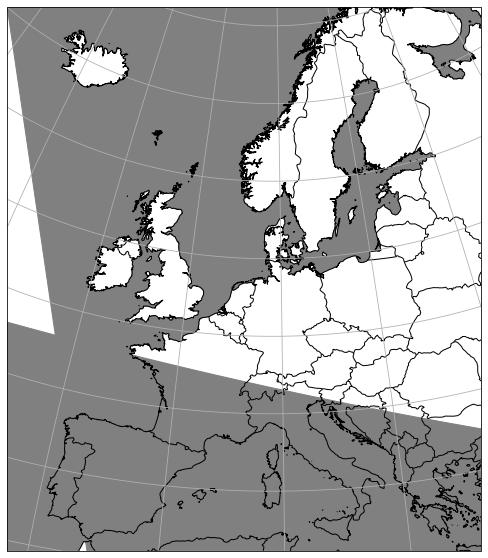

In [11]:
# Generates map of Europe.
import matplotlib.pyplot as plt
import cartopy
import cartopy.io.shapereader as shpreader
import cartopy.crs as ccrs

plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.EuroPP())
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=1)
ax.coastlines(resolution='10m')
ax.add_feature(cartopy.feature.OCEAN,facecolor=(0.5,0.5,0.5))
ax.gridlines()

In [15]:
# Listing cemetery names
locs = abmc_df[' Cemetery/Memorial '].value_counts()
print(locs)

Meuse-Argonne American Cemetery     15183
Oise-Aisne American Cemetery         6255
St. Mihiel American Cemetery         4442
Aisne-Marne American Cemetery        3348
Suresnes American Cemetery           2514
Somme American Cemetery              2169
Brookwood American Cemetery          1032
Flanders Field American Cemetery      411
Corozal American Cemetery               3
Normandy American Cemetery              1
Name:  Cemetery/Memorial , dtype: int64


In [ ]:
# This will generate coordinates for the above locations.  As this runs now, it will check each entry and take a long time.  I want to modify it to check only the above listed place names.  Once coordinates are generated, I will plot the locations in the visualization section.

# Conda install geopy, prob through terminal tab above
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
# Open street maps API
geolocator = Nominatim(user_agent='twitter-analysis-client')
# Rate limiter tool to handle limiting issues automatically
# This task will take time to run
limited = RateLimiter(geolocator.geocode, min_delay_seconds=1)# If being limited, you can increase seconds

# Goes through each row of data frame, stores all locations, sends it to rate limiter which, sends to API to get coords.
def find_location(row):
    place = row[' Cemetery/Memorial ']
    location = limited(place)
    # If loacations exists, right or wrong, it will return lat/long
    if location != None:
        return location.latitude, location.longitude
    # If nothing, it returns not found not found
    else:
        return "Not Found", "Not Found"
# This adds to current sata frame with new found lat long data
abmc_df[['latitude','longitude']] = abmc_df.apply(find_location, axis="columns", result_type="expand")
abmc_df
# Review and be suspect of coords


### Word Cloud Analysis

I will use this section to analyze text from the csv, such as rank, state, and unit to generate word clouds.  I’ll use NLTK to tokenize the data, and chart a word cloud following the Week 13 demos.

In [17]:
import re
re_list = ['(https?://)?(www\.)?(\w+\.)?(\w+)(\.\w+)(/.+)?', '@[A-Za-z0-9_]+','#']
combined_re = re.compile( '|'.join( re_list) )
regex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)

In [ ]:
# Using BeautifulSoup and NLTK for word cloud generation
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
token = WordPunctTokenizer()
def cleaning_tweets(t):
    del_amp = BeautifulSoup(t, 'lxml')
    del_amp_text = del_amp.get_text()
    del_link_mentions = re.sub(combined_re, '', del_amp_text)
    del_emoticons = re.sub(regex_pattern, '', del_link_mentions)
    lower_case = del_emoticons.lower()
    words = token.tokenize(lower_case)
    result_words = [x for x in words if len(x) > 2]
    return (" ".join(result_words)).strip()

In [ ]:
abmc_units = []
for i in range(0,len(abmc_df['ABMC Burial Unit'])):
   
    abmc_units.append(cleaning_tweets((abmc_df.text[i])))
print(abmc_units[0:50])

In [ ]:
# Setting stop words
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)

In [ ]:
# Creating the basic word cloud as a test, assess for additional stop words
string = pd.Series(abmc_units).str.cat(sep=' ')
wordcloud = WordCloud(width=1600, stopwords=stopwords,height=800,max_font_size=200,max_words=50,collocations=False, background_color='white').generate(string)
plt.figure(figsize=(40,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Visualization

The visualization section will follow the same order as the analysis section.  They will include chart visualizations from the Pandas data frame analysis, a plotted map, and a interesting word cloud.

### Pandas Analysis

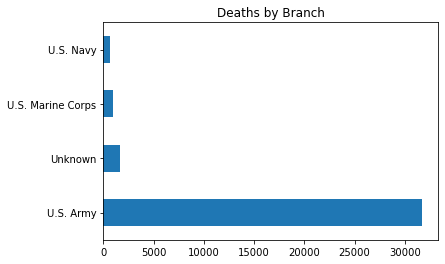

In [18]:
# Visualization.  15 vaule counts, plots out as a bar horizontl, gives title of plot.  
abmc_df['Branch'].value_counts()[:4].plot(kind="barh", title="Deaths by Branch")

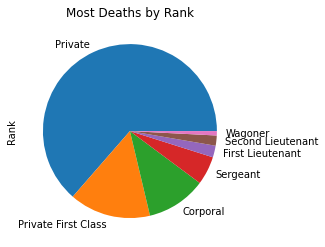

In [19]:
abmc_df['Rank'].value_counts()[:7].plot(kind="pie", title="Most Deaths by Rank")

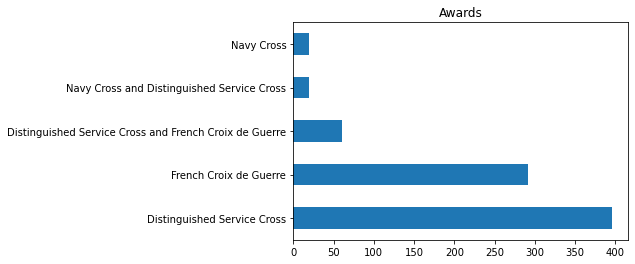

In [20]:
abmc_df['Awards'].value_counts()[:5].plot(kind="barh", title="Awards")

### Map Analysis

This section requires further debugging in order to plot the above map of Europe.  It will loosely follow the below code.

In [ ]:
# Importing plot styles
import matplotlib.pyplot as plt
plt.style.use('dark_background')
plt.rcParams.update({'font.size': 20})
plt.rcParams['figure.figsize'] = (20, 10)

In [ ]:
# Cleaning up the Not Founds
abmc_df = abmc_df[abmc_df['latitude'] != 'Not Found']
abmc_df = abmc_df[abmc_df['longitude'] != 'Not Found']

lats = abmc_df['latitude']
longs = abmc_df['longitude']

print(lats)
print(longs)
# Ths generates a nonsequential index, which will creat a problem.  This is because the not foundswere removed, but previous indexes were kept.  Good, but not what we need.


In [ ]:
# This re indexes the data into a useable sequence
lats.index=range(0,len(lats))
longs.index=range(0,len(longs))

print(lats)

In [ ]:
import cartopy.crs as ccrs
from matplotlib.patches import Circle

ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
    
for i in range(0, len(lats)):
    ax.plot(longs[i], lats[i], 'ro', transform=ccrs.PlateCarree())
                                                                                    
ax.coastlines(resolution='50m')
ax.set_global()

plt.show()

In [ ]:
# Creating density radius
counter = abmc_df.groupby(['latitude','longitude']).size().reset_index().rename(columns={0:'count'})

print(counter)

In [ ]:
# Plotting density.  Where this is built for tweet density, I'd like to use it to suggest cemetery size
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
                                                                                                      
for i in range(0, len(lats)):
    ax.plot(longs[i], lats[i], 'ro', transform=ccrs.PlateCarree())
                           
                                                                                                
ax.coastlines(resolution='50m')
ax.set_global()
def get_radius(freq):
    if freq < 5:
        return 1
    elif freq < 10:
        return 2
    elif freq >= 10:
        return 3


colLats = counter['latitude']
colLongs = counter['longitude']
colCounts = counter['count']

for i in range(0, len(counter)):
    ax.add_patch(Circle(xy=[colLongs[i], colLats[i]], radius=get_radius(colCounts[i]), color='blue',alpha=0.5, transform=ccrs.PlateCarree()))

plt.show()

### Word Cloud Analysis 

This section will generate a more interesting word cloud.  

In [ ]:
import numpy as np
# Python Imaging Library
from PIL import Image
import random

In [ ]:
# This is an image of a poppy flower, an international symbol of WWI remembrance  
mask = np.array(Image.open('./poppy.jpg'))

In [ ]:
# Making the wordcloud
wordcloud = WordCloud(width=1600, mask = mask,stopwords=stopwords,height=800,max_font_size=200,max_words=50,collocations=False,background_color='white').generate(string)
f = plt.figure(figsize=(50,50))
f.add_subplot(1,2, 1)
plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
# Colors of the words in the cloud, I'd like to have red text on a white background
def gray_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(1, 1%%, %d%%)" % random.randint(10, 20)
plt.title('Original Image', size=80)

plt.axis("off")
f.add_subplot(1,2, 2)
plt.imshow(wordcloud.recolor(color_func=gray_color_func, random_state=3),
           interpolation="bilinear")
plt.title('ABMC Poppy Word Cloud', size=80)
plt.axis("off")
plt.show()